In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

In [24]:
import env
import acquire
import prepare
import summarize
# import pandas_profiling


    id  parcelid             logerror transactiondate   id  parcelid  \
0   20  12325145                 0.04      2017-01-02   20  11324547   
1   31  14338242                -0.02      2017-01-02   31  11544747   
2   33  12155445                -0.04      2017-01-02   33  11585547   
3  110  14724525                 0.04      2017-01-03  110  12716947   
4  111  14179809                -0.00      2017-01-03  111  12757147   

   airconditioningtypeid  architecturalstyletypeid         basementsqft  \
0                   1.00                       nan                  nan   
1                   1.00                       nan                  nan   
2                    nan                       nan                  nan   
3                    nan                       nan                  nan   
4                   1.00                       nan                  nan   

           bathroomcnt           bedroomcnt buildingclasstypeid  \
0                 2.00                 4.00      

                        id             parcelid             logerror  \
count            55,720.00            55,720.00            55,720.00   
mean             38,694.38        12,992,829.29                 0.02   
std              22,359.55         3,173,834.47                 0.17   
min                  20.00        10,711,855.00                -4.66   
25%              19,482.75        11,538,718.50                -0.02   
50%              38,819.50        12,527,437.50                 0.01   
75%              57,160.25        14,211,470.50                 0.04   
max              77,613.00       167,689,317.00                 5.26   

                        id             parcelid  airconditioningtypeid  \
count            55,720.00            55,720.00              13,641.00   
mean             38,694.38        13,057,802.67                   2.36   
std              22,359.55         4,674,927.93                   3.74   
min                  20.00        10,711,745.00        

In [3]:
df = acquire.acquire_zillow()


Prevent 'head' from truncating the number of columns

In [4]:
pd.set_option('display.max_columns', None) 

In [5]:
# pandas_profiling.ProfileReport(df)

Remove duplicate columns

In [6]:
 df = prepare.remove_dup_col(df)

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [7]:
df_x = prepare.new_df(df)
df_x

,num_rows_missing,pct_rows_missing
id,0,0.00
parcelid,0,0.00
logerror,0,0.00
transactiondate,0,0.00
airconditioningtypeid,42079,75.52
architecturalstyletypeid,55659,99.89
basementsqft,55677,99.92
bathroomcnt,0,0.00
bedroomcnt,0,0.00
buildingclasstypeid,55720,100.00


Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [8]:
rows_missing = prepare.nulls_by_row(df)
rows_missing.head()

,num_cols_missing,pct_cols_missing,num_rows
0,24,35.294117647058826,9
1,25,36.76470588235294,13
2,26,38.23529411764706,21
3,27,39.705882352941174,115
4,28,41.17647058823529,316


In [9]:
df.isnull().values.ravel().sum() #How many empty cells within the entire df

1837420

Sort values by transaction data (ascending) in order to filter out the houses that sold more than once in 2017

In [10]:
df.sort_values("transactiondate", ascending = True, inplace=True)
df.head()

,id,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,20,12325145,0.04,2017-01-02,1.00,nan,nan,2.00,4.00,None,8.00,2.00,nan,nan,"3,633.00","3,633.00",nan,None,nan,nan,"6,037.00",nan,2.00,nan,nan,nan,2.00,"34,560,018.00","-118,169,806.00","9,826.00",nan,nan,nan,nan,nan,0100,261.00,LCA22,"60,379,102.06","40,227.00","3,101.00",nan,"97,329.00",0.00,nan,nan,nan,1.00,nan,nan,"2,005.00",nan,nan,"222,321.00","296,425.00","2,016.00","74,104.00","6,941.39",None,nan,nan,Central,None,None,Central,Single Family Residential,None,None
1,31,14338242,-0.02,2017-01-02,1.00,nan,nan,4.00,3.00,None,11.00,4.00,nan,nan,"1,620.00","1,620.00",nan,None,nan,nan,"6,037.00",nan,4.00,nan,nan,nan,2.00,"33,996,200.00","-118,438,000.00",nan,nan,nan,nan,nan,nan,0100,261.00,LAR3,"60,372,722.02","12,447.00","3,101.00","116,415.00","96,047.00",0.00,nan,nan,nan,1.00,nan,nan,"2,011.00",nan,nan,"339,532.00","847,770.00","2,016.00","508,238.00","10,244.94",None,nan,nan,Central,None,None,Central,Single Family Residential,None,None
2,33,12155445,-0.04,2017-01-02,nan,nan,nan,2.00,3.00,None,8.00,2.00,nan,nan,"2,077.00","2,077.00",nan,None,nan,nan,"6,037.00",nan,2.00,nan,nan,nan,2.00,"34,012,977.00","-118,479,243.00","6,490.00",nan,nan,nan,nan,nan,0100,261.00,SMR2*,"60,377,022.01","26,964.00","3,101.00",nan,"96,152.00",0.00,nan,nan,nan,1.00,nan,nan,"1,926.00",nan,nan,"210,192.00","646,760.00","2,016.00","436,568.00","7,924.68",None,nan,nan,None,None,None,Central,Single Family Residential,None,None
65,373,11744823,0.08,2017-01-03,nan,nan,nan,2.00,3.00,None,nan,2.00,nan,"1,456.00","1,456.00","1,456.00",nan,None,"1,456.00",nan,"6,111.00",1.00,2.00,3.00,780.00,nan,nan,"34,378,340.00","-118,936,013.00","11,000.00",nan,nan,nan,nan,nan,1110,261.00,None,"61,110,003.03","18,098.00","2,061.00",nan,"97,094.00",5.00,nan,nan,nan,nan,324.00,nan,"1,964.00",1.00,nan,"119,084.00","178,107.00","2,016.00","59,023.00","1,998.80",None,nan,"61,110,003,033,043.00",None,None,None,None,Single Family Residential,None,None
64,372,12439387,-0.02,2017-01-03,nan,nan,nan,2.00,3.00,None,nan,2.00,66.00,"2,266.00","2,266.00","2,266.00",nan,None,"2,266.00",nan,"6,111.00",2.00,2.00,5.00,"1,258.00",nan,nan,"34,371,870.00","-119,056,755.00","24,402.00",nan,nan,nan,nan,nan,1110,261.00,None,"61,110,004.00","26,965.00","2,061.00",nan,"97,113.00",6.00,nan,nan,nan,nan,nan,nan,"1,987.00",1.00,nan,"357,372.00","675,590.00","2,016.00","318,218.00","7,629.16",None,nan,"61,110,004,003,003.00",None,None,None,None,Single Family Residential,None,None


Verify that parcelid indicates multiple sales within 2017

In [11]:
df.parcelid.value_counts().sort_values()

12496799    1
13940649    1
10803109    1
12771236    1
11320129    1
14749598    1
11214748    1
14231451    1
11751318    1
12017556    1
13072273    1
10848143    1
11116428    1
12562314    1
17282953    1
11519879    1
12177286    1
14671748    1
13961346    1
17180603    1
12381363    1
12844928    1
11659203    1
12335097    1
11995353    1
11290615    1
13932461    1
14702517    1
11568751    1
11701870    1
           ..
12402398    2
11743374    2
11711539    2
13067305    2
11391577    2
10779619    2
14008322    2
14236060    2
14097534    2
10858360    2
10984080    2
11999890    2
11496770    2
11627049    2
13066981    2
14455319    2
11501340    2
11446756    2
12048224    2
10976131    2
12847318    2
10852812    2
12612211    2
14092694    2
10753427    2
12575721    2
11917650    2
10879060    2
17136356    2
10857130    3
Name: parcelid, Length: 55602, dtype: int64

Remove all except the last sale (row) when a property has been bought and sold multiple times during the year.

In [12]:
df = prepare.drop_dups(df)
df.describe() #number has dropped the expected amount, 200 rows

,id,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,"55,602.00","55,602.00","55,602.00","13,614.00",61.00,42.00,"55,602.00","55,602.00","36,867.00","55,582.00",351.00,"4,720.00","55,597.00","55,393.00",18.00,"4,720.00",186.00,"55,602.00","7,598.00","55,582.00","18,218.00","18,218.00","1,239.00","36,954.00","55,602.00","55,602.00","55,302.00","10,911.00",764.00,411.00,828.00,"10,071.00","55,602.00","55,602.00","54,597.00","55,602.00","20,600.00","55,538.00","55,602.00",42.00,"6,002.00",69.00,"36,924.00","2,107.00",62.00,"55,573.00","15,434.00",68.00,"55,537.00","55,600.00","55,602.00","55,600.00","55,530.00","1,111.00","55,339.00"
mean,"38,727.96","12,993,421.31",0.02,2.36,7.41,600.10,2.25,3.31,6.17,2.25,66.00,"1,489.32","1,869.66","1,871.64","1,404.00","1,503.73","1,325.82","6,048.81",1.18,2.20,1.92,487.17,1.00,4.08,"34,016,059.33","-118,206,451.84","11,075.05",1.00,521.52,1.00,1.00,1.00,261.01,"60,491,170.30","35,489.49","2,558.93","180,583.10","96,599.74",1.89,7.00,1.01,6.00,1.00,338.57,248.48,"1,961.22",1.38,1.00,"178,325.00","456,491.54","2,016.00","278,368.60","5,564.53",13.94,"60,490,976,194,907.54"
std,"22,358.59","3,176,264.50",0.17,3.74,2.61,473.76,0.99,0.92,1.70,0.99,0.00,628.56,963.99,963.96,142.83,683.80,848.28,21.19,0.49,0.97,0.57,162.74,0.00,2.55,"248,795.31","352,446.79","84,526.84",0.00,162.21,0.00,0.00,0.00,0.31,"210,351.65","54,138.79",788.17,"162,336.44","4,473.79",3.16,0.00,0.13,0.00,0.04,257.22,271.64,21.98,0.53,0.00,"228,806.25","593,597.81",0.04,"418,201.82","6,826.59",1.54,"210,350,551,381.51"
min,20.00,"10,711,855.00",-4.66,1.00,2.00,63.00,1.00,1.00,1.00,1.00,66.00,316.00,320.00,320.00,"1,056.00",316.00,368.00,"6,037.00",1.00,1.00,0.00,0.00,1.00,1.00,"33,340,711.00","-119,448,392.00",500.00,1.00,28.00,1.00,1.00,1.00,261.00,"60,371,011.10","3,491.00","1,286.00","6,952.00","95,982.00",0.00,7.00,1.00,6.00,1.00,11.00,14.00,"1,862.00",1.00,1.00,10.00,"7,584.00","2,014.00","2,250.00",20.24,6.00,"60,371,011,101,000.00"
25%,"19,526.00","11,538,715.50",-0.02,1.00,7.00,218.00,2.00,3.00,4.00,2.00,66.00,"1,133.00","1,262.00","1,264.00","1,350.00","1,138.00",802.25,"6,037.00",1.00,2.00,2.00,420.00,1.00,2.00,"33,836,684.75","-118,403,432.00","5,691.00",1.00,435.00,1.00,1.00,1.00,261.00,"60,374,002.05","12,447.00","2,061.00","41,131.00","96,193.00",0.00,7.00,1.00,6.00,1.00,200.00,97.00,"1,949.00",1.00,1.00,"75,346.00","188,460.50","2,016.00","79,007.50","2,538.32",14.00,"60,374,002,061,018.00"
50%,"38,860.50","12,527,929.50",0.01,1.00,7.00,528.00,2.00,3.00,6.00,2.00,66.00,"1,371.00","1,631.00","1,632.00","1,440.00","1,373.00","1,036.50","6,037.00",1.00,2.00,2.00,460.00,1.00,2.00,"34,018,024.50","-118,159,711.50","6,800.00",1.00,500.00,1.00,1.00,1.00,261.00,"60,375,708.01","24,832.00","3,101.00","118,208.00","96,389.00",0.00,7.00,1.00,6.00,1.00,284.00,177.00,"1,958.00",1.00,1.00,"123,860.00","330,254.00","2,016.00","183,460.00","4,135.72",14.00,"60,375,708,002,007.00"
75%,"57,186.75","14,211,866.75",0.04,1.00,7.00,769.50,3.00,4.00,8.00,3.00,66.00,"1,691.00","2,217.00","2,219.00","1,440.00","1,697.00","1,474.25","6,059.00",1.00,3.00,2.00,532.00,1.00,7.00,"34,181,063.00","-117,949,571.50","8,619.00",1.00,590.50,1

Confirm that duplicate have been removed

In [13]:
df.parcelid.value_counts().sort_values()

12853244    1
12381363    1
12844928    1
11659203    1
12335097    1
11290615    1
12734454    1
17192949    1
11823091    1
14450672    1
11438063    1
11571182    1
14361724    1
13027303    1
14344164    1
11855843    1
13037538    1
12001066    1
14684336    1
14626778    1
12269529    1
14204306    1
10962903    1
10721229    1
17180603    1
11644874    1
13961346    1
12177286    1
14429946    1
12852988    1
           ..
14135350    1
14692358    1
11943944    1
17195020    1
14409852    1
12177530    1
10729591    1
14006327    1
12167221    1
12558388    1
13080627    1
10836011    1
11878440    1
10954789    1
17111075    1
12185662    1
11735074    1
12255264    1
14215197    1
12819136    1
12632088    1
11319319    1
14244214    1
12099604    1
12679128    1
10913809    1
13059873    1
12478477    1
11077665    1
10754051    1
Name: parcelid, Length: 55602, dtype: int64

Confirm that duplicates have been removed

In [14]:
a = df.isnull().sum()/len(df) #nulls as a % of total
a

id                                             0.00
parcelid                                       0.00
logerror                                       0.00
transactiondate                                0.00
airconditioningtypeid                          0.76
architecturalstyletypeid                       1.00
basementsqft                                   1.00
bathroomcnt                                    0.00
bedroomcnt                                     0.00
buildingclasstypeid                            1.00
buildingqualitytypeid                          0.34
calculatedbathnbr                              0.00
decktypeid                                     0.99
finishedfloor1squarefeet                       0.92
calculatedfinishedsquarefeet                   0.00
finishedsquarefeet12                           0.00
finishedsquarefeet13                           1.00
finishedsquarefeet15                           1.00
finishedsquarefeet50                           0.92
finishedsqua

In [15]:
df = prepare.handle_missing_values(df, prop_required_column = .5, prop_required_row = .75)

In [16]:
df = prepare.data_prep(df, cols_to_remove=[], prop_required_column=.6, prop_required_row=.75)

Check how many columns still have null values

In [17]:
df.isnull().sum()

id                                  0
parcelid                            0
logerror                            0
transactiondate                     0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18728
calculatedbathnbr                  16
calculatedfinishedsquarefeet        4
finishedsquarefeet12              203
fips                                0
fullbathcnt                        16
heatingorsystemtypeid           18641
latitude                            0
longitude                           0
lotsizesquarefeet                 299
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              18674
rawcensustractandblock              0
regionidcity                      999
regionidcounty                      0
regionidzip                        60
roomcnt                             0
unitcnt                         18671
yearbuilt                          28
structuretax

In [18]:
df = prepare.drop_col(df)

In [19]:
df.isnull().sum()

id                               0
parcelid                         0
logerror                         0
transactiondate                  0
bathroomcnt                      0
bedroomcnt                       0
calculatedfinishedsquarefeet     4
fips                             0
latitude                         0
longitude                        0
propertycountylandusecode        0
propertylandusetypeid            0
rawcensustractandblock           0
regionidcounty                   0
regionidzip                     60
roomcnt                          0
structuretaxvaluedollarcnt      64
taxvaluedollarcnt                2
assessmentyear                   0
landtaxvaluedollarcnt            2
taxamount                       71
propertylandusedesc              0
dtype: int64

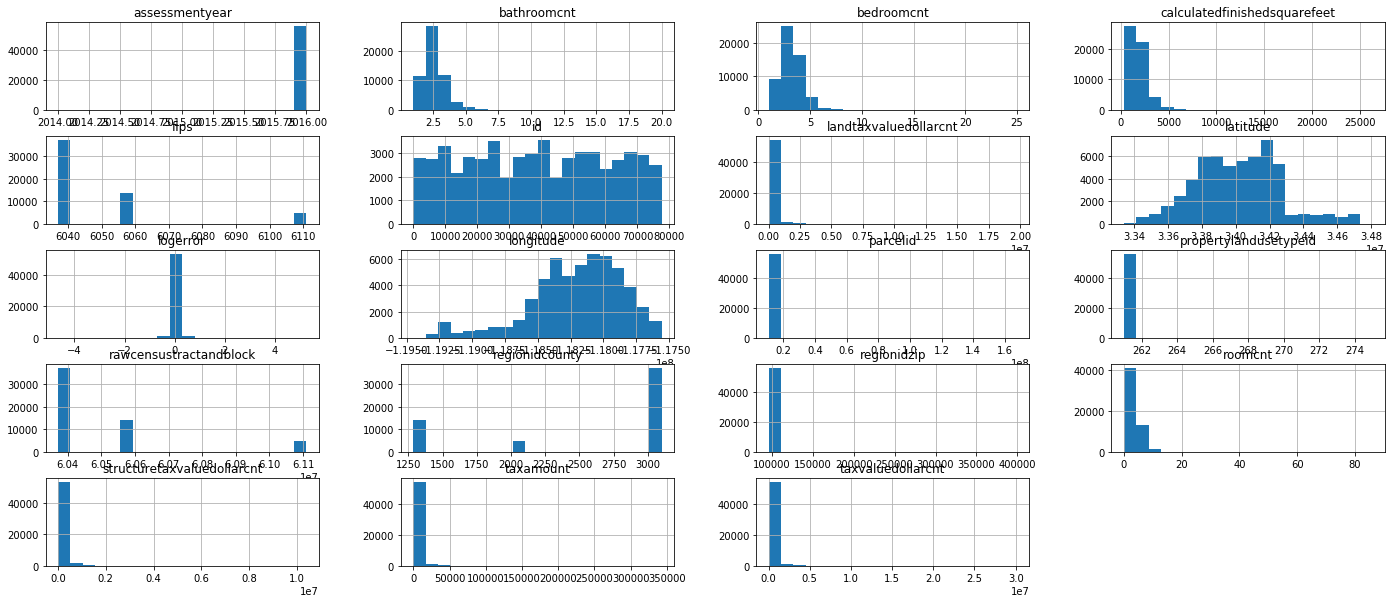

In [20]:
df.hist(figsize=(24, 10), bins=20)
plt.show()

Impute values for calculatedfinishedsquarefeet

In [21]:
df = prepare.impute_values(df)

Check if any nulls remain

In [22]:
df.isnull().sum()

id                              0
parcelid                        0
logerror                        0
transactiondate                 0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
propertycountylandusecode       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
propertylandusedesc             0
dtype: int64

## Mall data

In [32]:
df3 = acquire.acquire_mallcustomer_data()
df3.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
import summarize

In [33]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df3, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    outlier_cols = {col + '_outliers': get_upper_outliers(df3[col], k)
                     for col in df3.select_dtypes('number')}
    return df3.assign(**outlier_cols)

    for col in df3.select_dtypes('number'):
        df3[col + '_outliers'] = get_upper_outliers(df3[col], k)

    return df3

add_upper_outlier_columns(df3, k=1.5)

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers
0,1,Male,19,15,39,0,0,0.00,0
1,2,Male,21,15,81,0,0,0.00,0
2,3,Female,20,16,6,0,0,0.00,0
3,4,Female,23,16,77,0,0,0.00,0
4,5,Female,31,17,40,0,0,0.00,0
5,6,Female,22,17,76,0,0,0.00,0
6,7,Female,35,18,6,0,0,0.00,0
7,8,Female,23,18,94,0,0,0.00,0
8,9,Male,64,19,3,0,0,0.00,0
9,10,Female,30,19,72,0,0,0.00,0


In [35]:
def get_lower_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_bound = q3 - k * iqr
    return s.apply(lambda x: max([x - lower_bound, 0]))

def add_lower_outlier_columns(df3, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    outlier_cols = {col + '_outliers': get_lower_outliers(df3[col], k)
                     for col in df3.select_dtypes('number')}
    return df3.assign(**outlier_cols)

    for col in df3.select_dtypes('number'):
        df3[col + '_outliers'] = get_lower_outliers(df3[col], k)

    return df3

add_lower_outlier_columns(df3, k=1.5)

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers
0,1,Male,19,15,39,0.00,0.38,0.00,23.38
1,2,Male,21,15,81,1.00,2.38,0.00,65.38
2,3,Female,20,16,6,2.00,1.38,0.00,0.00
3,4,Female,23,16,77,3.00,4.38,0.00,61.38
4,5,Female,31,17,40,4.00,12.38,0.00,24.38
5,6,Female,22,17,76,5.00,3.38,0.00,60.38
6,7,Female,35,18,6,6.00,16.38,0.00,0.00
7,8,Female,23,18,94,7.00,4.38,0.00,78.38
8,9,Male,64,19,3,8.00,45.38,0.00,0.00
9,10,Female,30,19,72,9.00,11.38,0.00,56.38
